In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

natal br
codrington ag
victoria sc
nizhneyansk ru
yellowknife ca
manta ec
kawana waters au
salinas ec
bethel us
ushuaia ar
rikitea pf
ushuaia ar
bethel us
nikolskoye ru
ushuaia ar
labuan my
la plata ar
port elizabeth za
berbera so
lompoc us
georgetown sh
anqing cn
samusu ws
machacamarca bo
constitucion mx
mataura pf
demba cd
lodja cd
cape town za
avarua ck
roblin ca
airai pw
busselton au
albany au
tibati cm
hobart au
airai pw
balikpapan id
isiro cd
perth au
port elizabeth za
jamestown sh
college us
barbar sd
nizwa om
ilulissat gl
thompson ca
ketchikan us
hilo us
victoria sc
nhulunbuy au
along in
busselton au
cherskiy ru
gwalior in
amderma ru
hobart au
harrow ca
aksarka ru
jamestown sh
port alfred za
chokurdakh ru
qaanaaq gl
marquelia mx
punta arenas cl
hays us
owando cg
palabuhanratu id
aklavik ca
barrow us
ushuaia ar
cape town za
gorno-chuyskiy ru
port elizabeth za
jacareacanga br
jackson us
villa rica pe
qaanaaq gl
busselton au
waingapu id
barrow us
tuktoyaktuk ca
yomitan jp
tuktoyak

barentsburg sj
severo-kurilsk ru
port alfred za
butaritari ki
tiznit ma
pravda ru
ribeira grande pt
torbay ca
szczecinek pl
chokurdakh ru
palmer us
bluff nz
robertsport lr
souillac mu
illoqqortoormiut gl
ushuaia ar
sechura pe
mahebourg mu
ahipara nz
dingle ie
warqla dz
taolanaro mg
hermanus za
port alfred za
vaitupu wf
tuktoyaktuk ca
kununurra au
lebu cl
hasaki jp
jumla np
tambul sd
kodiak us
belushya guba ru
sampit id
cherskiy ru
faanui pf
ushuaia ar
najran sa
west bay ky
atuona pf
mananjary mg
nikolskoye ru
busselton au
nikolskoye ru
hilo us
cine tr
longyearbyen sj
mudgee au
yellowknife ca
port alfred za
vaini to
calvinia za
mataura pf
bredasdorp za
mataura pf
kapaa us
kavaratti in
sandnessjoen no
atuona pf
saint george bm
rikitea pf
scarborough tt
safwah sa
ylojarvi fi
ostersund se
klaksvik fo
chapais ca
ushuaia ar
carnarvon au
agadez ne
lalitpur in
qandahar af
albany au
ushuaia ar
xinye cn
port alfred za
palabuhanratu id
vaini to
hilo us
vikhorevka ru
broome au
price us
carnarvon a

cape town za
qaanaaq gl
norman wells ca
husavik is
port alfred za
xai-xai mz
yellowknife ca
leh in
petatlan mx
chibombo zm
longyearbyen sj
san luis ph
kosa ru
bredasdorp za
ushuaia ar
visby se
castelo do piaui br
puerto ayora ec
butaritari ki
amapa br
padang id
hobart au
arraial do cabo br
husavik is
roebourne au
dikson ru
georgetown sh
punta arenas cl
coos bay us
albany au
veraval in
chom bung th
waspan ni
belushya guba ru
busselton au
belyy yar ru
rikitea pf
mys shmidta ru
reefton nz
barentsburg sj
barentsburg sj
jumla np
kapaa us
taolanaro mg
port alfred za
punta arenas cl
nerchinskiy zavod ru
chavakkad in
hirara jp
road town vg
jamestown sh
esperance au
camopi gf
barra do garcas br
georgetown sh
bargal so
yerbogachen ru
thompson ca
illoqqortoormiut gl
springbok za
longyearbyen sj
luderitz na
atuona pf
punta arenas cl
nikolskoye ru
sechura pe
taolanaro mg
tuktoyaktuk ca
haines junction ca
tingrela ci
tahe cn
touros br
bengkulu id
svetlaya ru
lesnoy ru
port elizabeth za
nikolskoye ru

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b7ebf29130843a0418ab5f77ebdcde86


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b7ebf29130843a0418ab5f77ebdcde86&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | natal
Processing Record 2 of Set 13 | codrington
Processing Record 3 of Set 13 | victoria
Processing Record 4 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 13 | yellowknife
Processing Record 6 of Set 13 | manta
Processing Record 7 of Set 13 | kawana waters
City not found. Skipping...
Processing Record 8 of Set 13 | salinas
Processing Record 9 of Set 13 | bethel
Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | rikitea
Processing Record 12 of Set 13 | nikolskoye
Processing Record 13 of Set 13 | labuan
Processing Record 14 of Set 13 | la plata
Processing Record 15 of Set 13 | port elizabeth
Processing Record 16 of Set 13 | berbera
Processing Record 17 of Set 13 | lompoc
Processing Record 18 of Set 13 | georgetown
Processing Record 19 of Set 13 | anqing
Processing Record 20 of Set 13 | samusu
City not found. Skipping...
Processing Record 21 o

Processing Record 32 of Set 16 | slonim
Processing Record 33 of Set 16 | lethem
Processing Record 34 of Set 16 | nortelandia
Processing Record 35 of Set 16 | vila velha
Processing Record 36 of Set 16 | faya
Processing Record 37 of Set 16 | castro
Processing Record 38 of Set 16 | ayapel
Processing Record 39 of Set 16 | trenggalek
Processing Record 40 of Set 16 | panguna
Processing Record 41 of Set 16 | zakamensk
Processing Record 42 of Set 16 | magole
Processing Record 43 of Set 16 | mosquera
Processing Record 44 of Set 16 | portland
Processing Record 45 of Set 16 | turukhansk
Processing Record 46 of Set 16 | svetlyy
Processing Record 47 of Set 16 | petropavlovsk-kamchatskiy
Processing Record 48 of Set 16 | mar del plata
Processing Record 49 of Set 16 | kolyvan
Processing Record 50 of Set 16 | barentsburg
City not found. Skipping...
Processing Record 1 of Set 17 | atambua
Processing Record 2 of Set 17 | bredasdorp
Processing Record 3 of Set 17 | vaitupu
City not found. Skipping...
Proce

Processing Record 16 of Set 20 | komsomolskiy
Processing Record 17 of Set 20 | tadine
Processing Record 18 of Set 20 | sitka
Processing Record 19 of Set 20 | necochea
Processing Record 20 of Set 20 | saleaula
City not found. Skipping...
Processing Record 21 of Set 20 | sambava
Processing Record 22 of Set 20 | xai-xai
Processing Record 23 of Set 20 | yuci
Processing Record 24 of Set 20 | baoqing
Processing Record 25 of Set 20 | kuche
City not found. Skipping...
Processing Record 26 of Set 20 | brigantine
Processing Record 27 of Set 20 | ji-parana
City not found. Skipping...
Processing Record 28 of Set 20 | warqla
City not found. Skipping...
Processing Record 29 of Set 20 | deputatskiy
Processing Record 30 of Set 20 | tiznit
Processing Record 31 of Set 20 | pravda
Processing Record 32 of Set 20 | ribeira grande
Processing Record 33 of Set 20 | szczecinek
Processing Record 34 of Set 20 | palmer
Processing Record 35 of Set 20 | robertsport
Processing Record 36 of Set 20 | sechura
Processin

City not found. Skipping...
Processing Record 1 of Set 24 | kendal
Processing Record 2 of Set 24 | tarudant
City not found. Skipping...
Processing Record 3 of Set 24 | himora
City not found. Skipping...
Processing Record 4 of Set 24 | arlit
Processing Record 5 of Set 24 | fuling
Processing Record 6 of Set 24 | mezen
Processing Record 7 of Set 24 | laela
Processing Record 8 of Set 24 | kuching
Processing Record 9 of Set 24 | coffs harbour
Processing Record 10 of Set 24 | mombaca
Processing Record 11 of Set 24 | yangambi
Processing Record 12 of Set 24 | dolbeau
City not found. Skipping...
Processing Record 13 of Set 24 | divnoye
Processing Record 14 of Set 24 | thunder bay
Processing Record 15 of Set 24 | koumac
Processing Record 16 of Set 24 | cabedelo
Processing Record 17 of Set 24 | lakatoro
Processing Record 18 of Set 24 | dzhusaly
City not found. Skipping...
Processing Record 19 of Set 24 | bathsheba
Processing Record 20 of Set 24 | oshkosh
Processing Record 21 of Set 24 | altamont


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Natal,-5.7950,-35.2094,88.02,62,40,19.57,BR,2022-04-26 14:27:39
1,Codrington,-38.2667,141.9667,61.30,72,100,10.13,AU,2022-04-26 14:28:39
2,Victoria,22.2855,114.1577,82.45,87,64,4.00,HK,2022-04-26 14:28:39
3,Yellowknife,62.4560,-114.3525,36.12,69,75,12.66,CA,2022-04-26 14:28:40
4,Manta,-0.9500,-80.7333,78.58,83,100,10.36,EC,2022-04-26 14:28:37
5,Salinas,36.6777,-121.6555,52.07,78,100,1.77,US,2022-04-26 14:24:02
6,Bethel,41.3712,-73.4140,52.03,88,100,3.44,US,2022-04-26 14:28:41
7,Ushuaia,-54.8000,-68.3000,37.06,87,75,98.43,AR,2022-04-26 14:28:41
8,Rikitea,-23.1203,-134.9692,78.13,73,96,19.06,PF,2022-04-26 14:28:41
9,Nikolskoye,59.7035,30.7861,47.88,74,44,11.56,RU,2022-04-26 14:28:42


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Natal,BR,2022-04-26 14:27:39,-5.7950,-35.2094,88.02,62,40,19.57
1,Codrington,AU,2022-04-26 14:28:39,-38.2667,141.9667,61.30,72,100,10.13
2,Victoria,HK,2022-04-26 14:28:39,22.2855,114.1577,82.45,87,64,4.00
3,Yellowknife,CA,2022-04-26 14:28:40,62.4560,-114.3525,36.12,69,75,12.66
4,Manta,EC,2022-04-26 14:28:37,-0.9500,-80.7333,78.58,83,100,10.36
...,...,...,...,...,...,...,...,...,...
565,Svetlaya,RU,2022-04-26 14:45:41,46.5389,138.3297,36.77,91,100,5.99
566,Lesnoy,RU,2022-04-26 14:45:41,57.6198,63.0784,52.77,73,79,8.37
567,Saint Anthony,US,2022-04-26 14:45:42,45.0205,-93.2180,32.90,66,100,14.97
568,Imeni Poliny Osipenko,RU,2022-04-26 14:45:42,52.4201,136.4853,29.77,97,100,12.93


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

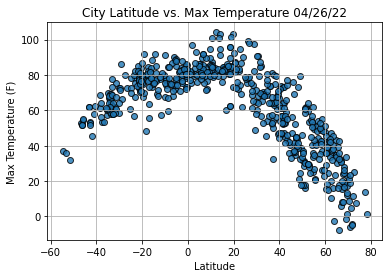

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

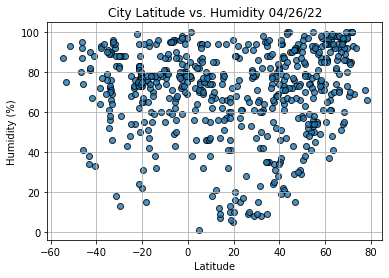

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

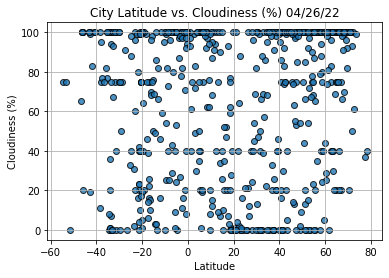

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

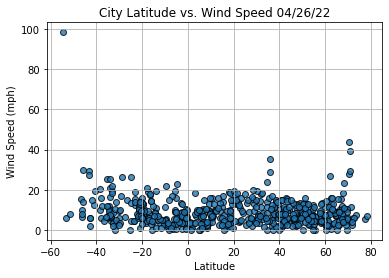

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Berbera
Country                        SO
Date          2022-04-26 14:28:45
Lat                       10.4396
Lng                       45.0143
Max Temp                     87.4
Humidity                       62
Cloudiness                     87
Wind Speed                  15.97
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
565     True
566     True
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Victoria,HK,2022-04-26 14:28:39,22.2855,114.1577,82.45,87,64,4.00
3,Yellowknife,CA,2022-04-26 14:28:40,62.4560,-114.3525,36.12,69,75,12.66
5,Salinas,US,2022-04-26 14:24:02,36.6777,-121.6555,52.07,78,100,1.77
6,Bethel,US,2022-04-26 14:28:41,41.3712,-73.4140,52.03,88,100,3.44
9,Nikolskoye,RU,2022-04-26 14:28:42,59.7035,30.7861,47.88,74,44,11.56
...,...,...,...,...,...,...,...,...,...
565,Svetlaya,RU,2022-04-26 14:45:41,46.5389,138.3297,36.77,91,100,5.99
566,Lesnoy,RU,2022-04-26 14:45:41,57.6198,63.0784,52.77,73,79,8.37
567,Saint Anthony,US,2022-04-26 14:45:42,45.0205,-93.2180,32.90,66,100,14.97
568,Imeni Poliny Osipenko,RU,2022-04-26 14:45:42,52.4201,136.4853,29.77,97,100,12.93


In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Victoria,HK,2022-04-26 14:28:39,22.2855,114.1577,82.45,87,64,4.00
3,Yellowknife,CA,2022-04-26 14:28:40,62.4560,-114.3525,36.12,69,75,12.66
5,Salinas,US,2022-04-26 14:24:02,36.6777,-121.6555,52.07,78,100,1.77
6,Bethel,US,2022-04-26 14:28:41,41.3712,-73.4140,52.03,88,100,3.44
9,Nikolskoye,RU,2022-04-26 14:28:42,59.7035,30.7861,47.88,74,44,11.56


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

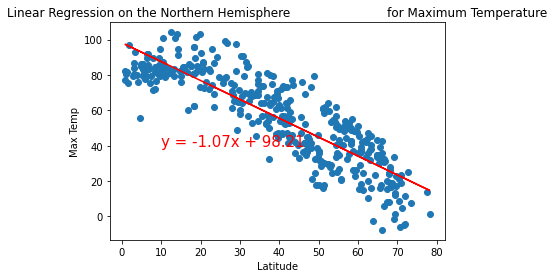

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

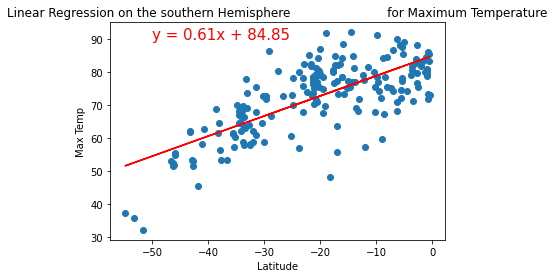

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))